In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download dhirensk/cats-vs-dogs-training8000test2000

Dataset URL: https://www.kaggle.com/datasets/dhirensk/cats-vs-dogs-training8000test2000
License(s): unknown
 93% 404M/436M [00:00<00:00, 468MB/s]
100% 436M/436M [00:00<00:00, 512MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cats-vs-dogs-training8000test2000.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!pip install fit_generator

ERROR: Could not find a version that satisfies the requirement fit_generator (from versions: none)
ERROR: No matching distribution found for fit_generator


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base= VGG16(
    weights= 'imagenet',
    include_top= False,
    input_shape= (150, 150, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model= Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation= 'sigmoid'))

In [ ]:
conv_base.trainable= False

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
batch_size= 32

train_datagen= ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True
)

test_datagen= ImageDataGenerator(rescale= 1./255)

train_generator= train_datagen.flow_from_directory(
    '/content/dataset/training_set',
    target_size= (150, 150),
    batch_size= batch_size,
    class_mode= 'binary'
)

validation_generator= test_datagen.flow_from_directory(
    '/content/dataset/test_set',
    target_size= (150, 150),
    batch_size= batch_size,
    class_mode= 'binary'
)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
history= model.fit(
    train_generator,
    epochs= 10,
    validation_data= validation_generator
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.7662 - loss: 0.4693

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 69s 276ms/step - accuracy: 0.7664 - loss: 0.4689 - val_accuracy: 0.8870 - val_loss: 0.2702
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 252ms/step - accuracy: 0.8871 - loss: 0.2730 - val_accuracy: 0.9065 - val_loss: 0.2442
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 257ms/step - accuracy: 0.8899 - loss: 0.2534 - val_accuracy: 0.8970 - val_loss: 0.2448
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 255ms/step - accuracy: 0.9013 - loss: 0.2410 - val_accuracy: 0.8745 - val_loss: 0.2539
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 67s 270ms/step - accuracy: 0.9018 - loss: 0.2312 - val_accuracy: 0.8990 - val_loss: 0.2584
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 250ms/step - accuracy: 0.9183 - loss: 0.2025 - val_accuracy: 0.9065 - val_loss: 0.2208
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 257ms/step - accuracy: 0.9133 - loss: 0.2076 - val_accuracy: 0.9075 - val_loss: 0.2462
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 258ms/step - accuracy: 0.9178 - loss: 0.1860 - val

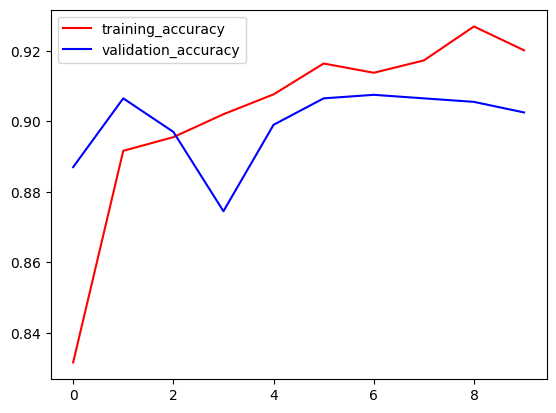

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color= 'red', label= 'training_accuracy')
plt.plot(history.history['val_accuracy'], color= 'blue', label= 'validation_accuracy')
plt.legend()
plt.show()

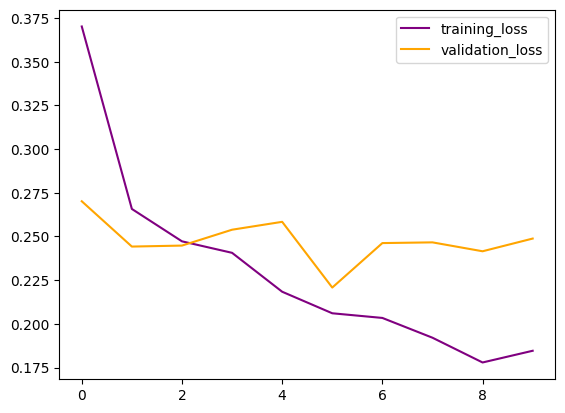

In [ ]:
plt.plot(history.history['loss'], color= 'purple', label= 'training_loss')
plt.plot(history.history['val_loss'], color= 'orange', label= 'validation_loss')
plt.legend()
plt.show()